In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np


In [4]:
np.random.seed(156)
img_size = (224,224)
batch_size = 32

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../../Dataset_3",
    validation_split= 0.2,
    subset='training',
    seed=123,
    image_size= img_size,
    batch_size=batch_size
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../../Dataset_3",
    validation_split= 0.2,
    subset='validation',
    seed=123,
    image_size= img_size,
    batch_size=batch_size
)

Found 25077 files belonging to 2 classes.
Using 20062 files for training.
Found 25077 files belonging to 2 classes.
Using 5015 files for validation.


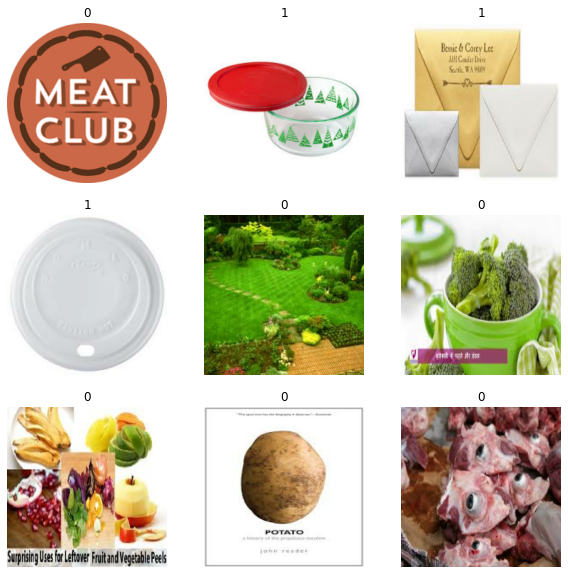

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

plt.show()

In [7]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")


def plot_hist_loss(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")

In [8]:
data_aug = keras.Sequential(
    [
     layers.experimental.preprocessing.RandomFlip("horizontal"),
     layers.experimental.preprocessing.RandomRotation(0.125),
    ],
    name = "aug_layer"
)

In [9]:
mainmodel = tf.keras.applications.EfficientNetB0(
            input_shape= (224,224,3),
            weights='imagenet',
            include_top= False,
            )

In [10]:
model = tf.keras.Sequential(
    [
        keras.Input(shape=(224,224,3)),
        data_aug,
        mainmodel,
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout (0.5),
        keras.layers.Dense(1,activation='relu'),

    ]
)
mainmodel.trainable = False

In [11]:
for layer in model.layers[-20:]:
            if not isinstance(layer,layers.BatchNormalization):
                layer.trainable = True

In [12]:
#hyperparameter : l_rate,batch_size,epoch, optimizer

In [13]:
optimizer = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer= optimizer, loss='binary_crossentropy',metrics=['accuracy'])

stopper = keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max',patience= 5)

In [14]:
model_run = model.fit(train_ds, validation_data=test_ds, epochs=25, callbacks=stopper)

Epoch 1/25
627/627 [==============================] - 242s 360ms/step - loss: 3.9610 - accuracy: 0.6776 - val_loss: 1.6143 - val_accuracy: 0.8596
Epoch 2/25
627/627 [==============================] - 212s 338ms/step - loss: 2.1835 - accuracy: 0.8255 - val_loss: 1.3331 - val_accuracy: 0.8816
Epoch 3/25
627/627 [==============================] - 212s 338ms/step - loss: 2.1001 - accuracy: 0.8324 - val_loss: 1.2116 - val_accuracy: 0.8989
Epoch 4/25
627/627 [==============================] - 213s 339ms/step - loss: 1.8351 - accuracy: 0.8557 - val_loss: 1.2291 - val_accuracy: 0.8961
Epoch 5/25
627/627 [==============================] - 215s 342ms/step - loss: 1.6483 - accuracy: 0.8719 - val_loss: 1.1768 - val_accuracy: 0.9065
Epoch 6/25
627/627 [==============================] - 214s 341ms/step - loss: 1.6429 - accuracy: 0.8736 - val_loss: 1.1382 - val_accuracy: 0.9067
Epoch 7/25
627/627 [==============================] - 213s 339ms/step - loss: 1.4676 - accuracy: 0.8872 - val_loss: 1.1142 -

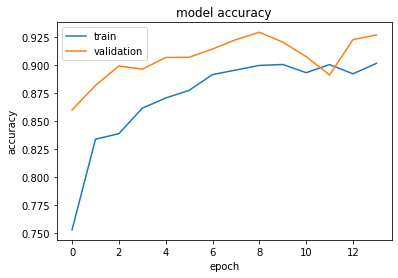

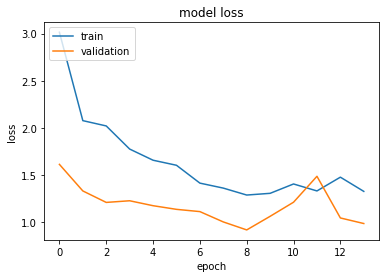

157/157 [==============================] - 19s 114ms/step - loss: 0.9880 - accuracy: 0.9266


In [16]:
plot_hist(model_run)
plt.savefig('Accuracy Curve_BSize_32')
plt.show()

plot_hist_loss(model_run)
plt.savefig('Loss Curve_BSize_32')
plt.show()


performance = model.evaluate(test_ds)